# Simulation 7

See README.md for a description.

### Importing libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import joblib
import time
import datetime
from tqdm import tqdm

import bandit as bdt
import agents as agt

In [2]:
savestats = False

### Parameters for the bandits

In [3]:
n_arms = 10
mu = 0; sigma = 1

### Parameters for the simulations

In [4]:
n_episodes = 1000
n_trials = 500

### Parameters for the agents

In [5]:
verbose = False

def agentSL_avg(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_avgreward(bandit, n_arms, params)
    agent.initialize_empty_opinion()
    return agent

def agentSL_max(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxreward(bandit, n_arms, params)
    agent.initialize_empty_opinion()
    return agent

def agentSL_maxs(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxrewardscaled(bandit, n_arms, params)
    agent.initialize_empty_opinion()
    return agent

def agentSL_maxs2(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxreward2scaled(bandit, n_arms, params)
    agent.initialize_empty_opinion()
    return agent
        
agents = [agentSL_avg, agentSL_max, agentSL_maxs, agentSL_maxs2]
label_agents = ['SL(avg)', 'SL(max)', 'SL(maxs)', 'SL(maxs2)']
n_agents = len(agents)

etas = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0]
n_etas = len(etas)

### Statistics to collect

In [6]:
optactions = np.zeros((n_etas, n_agents, n_trials,n_episodes))
totuncertainties = np.zeros((n_etas, n_agents, n_trials,n_episodes))
epuncertainties = np.zeros((n_etas, n_agents, n_trials,n_episodes))

### Simulations

In [7]:
for i,h in enumerate(etas):

    for t in tqdm(range(n_trials)):
        bandit = bdt.GaussianBandit(n_arms)
        bandit.initialize_gaussian_reward_distributions(mu, sigma)
        optimal_action = bandit.get_optimal_action()

        if(verbose): print('Levers means: {0}'.format(bandit.means))
        if(verbose): print('Optimal action: {0}'.format(optimal_action))

        for j,a in enumerate(agents):

            agent = a(bandit, n_arms, h)
            for e in range(n_episodes):   
                action,reward = agent.run()
                totuncertainties[i,j,t,e] = agent.get_total_uncertainty()
                epuncertainties[i,j,t,e] = agent.get_epistemic_uncertainty()
                if(action==optimal_action): optactions[i,j,t,e]=1

  0%|          | 0/500 [00:00<?, ?it/s]/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:153: RuntimeWarning: invalid value encountered in true_divide
  if (reward >= np.mean(self.rewards/self.steps)):
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:164: RuntimeWarning: invalid value encountered in true_divide
  if (reward >= np.max(self.rewards/self.steps)):
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:175: RuntimeWarning: invalid value encountered in true_divide
  if (reward >= np.max(self.rewards/self.steps)):
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:186: RuntimeWarning: invalid value encountered in true_divide
  estimated_rewards = self.rewards/self.steps
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:190: RuntimeWarning: invalid value encountered in double_scalars
  estimated_rewards[bestaction] = self.rewards[best

### Saving results

In [8]:
if(True):
    timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    joblib.dump(optactions,'sim7_optactions_'+timestamp+'.pkl')
    joblib.dump(totuncertainties,'sim7_totuncertainties_'+timestamp+'.pkl')
    joblib.dump(epuncertainties,'sim7_epuncertainties_'+timestamp+'.pkl')

### Plotting results

Text(0, 0.5, 'Percentage of optimal actions')

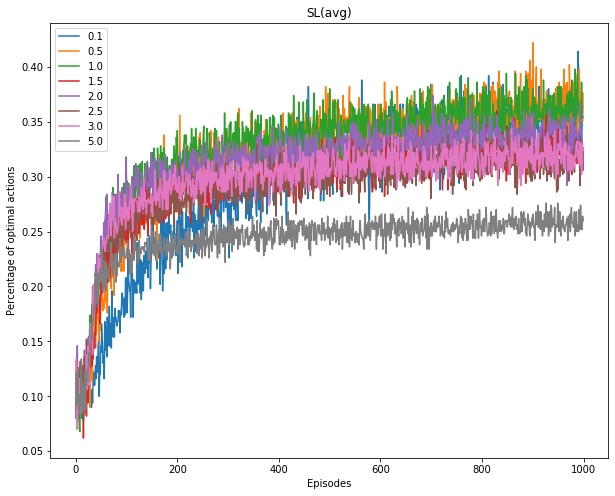

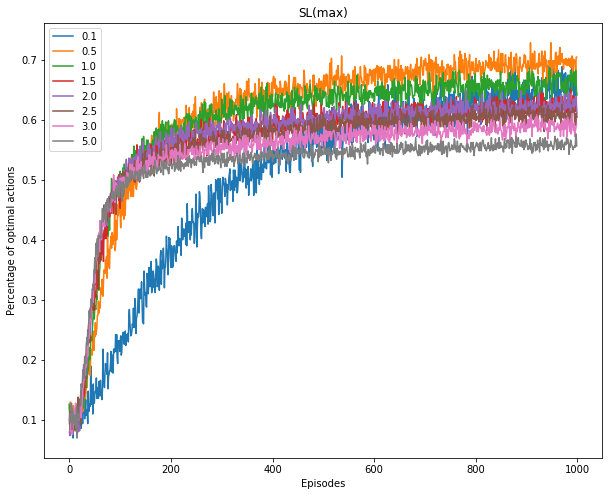

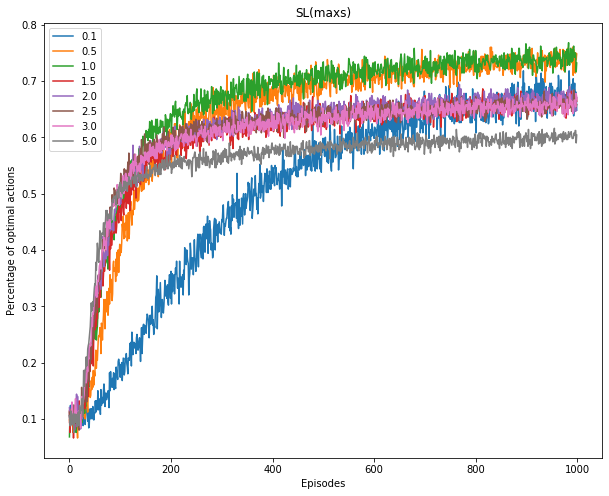

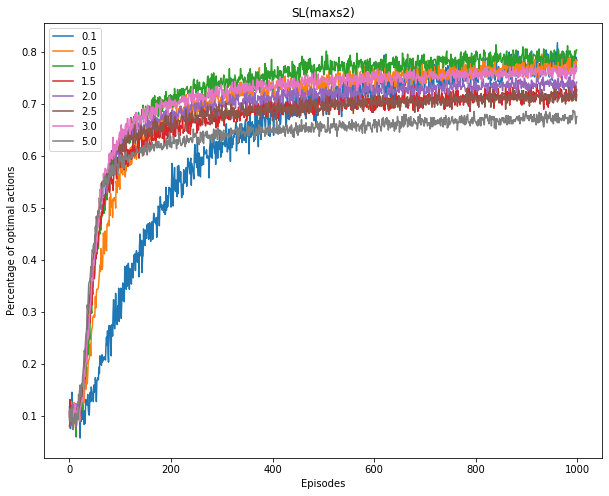

In [9]:
plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,0,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(avg)')
plt.xlabel('Episodes')
plt.ylabel('Percentage of optimal actions')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,1,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(max)')
plt.xlabel('Episodes')
plt.ylabel('Percentage of optimal actions')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,2,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(maxs)')
plt.xlabel('Episodes')
plt.ylabel('Percentage of optimal actions')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,3,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(maxs2)')
plt.xlabel('Episodes')
plt.ylabel('Percentage of optimal actions')

Text(0, 0.5, 'Entropy')

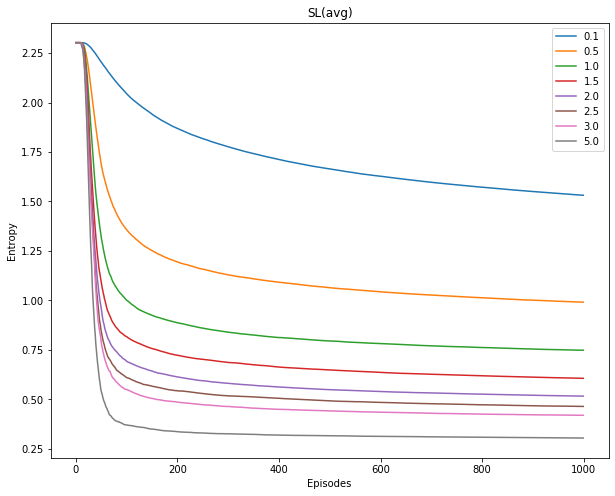

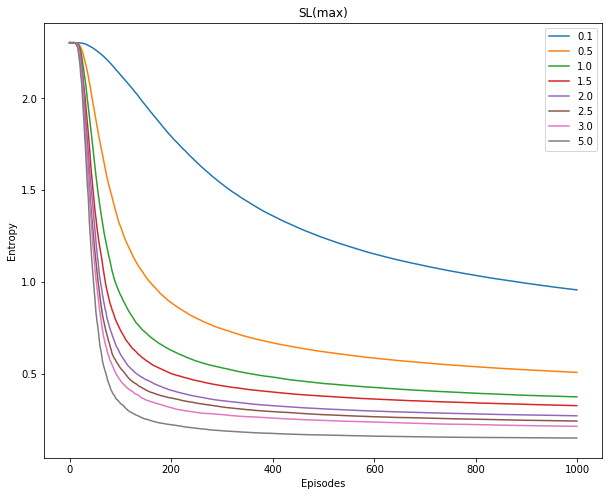

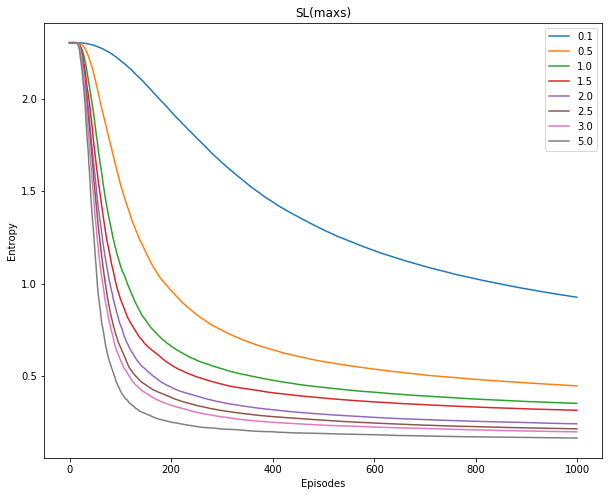

In [10]:
plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(totuncertainties[i,0,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(avg)')
plt.xlabel('Episodes')
plt.ylabel('Entropy')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(totuncertainties[i,1,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(max)')
plt.xlabel('Episodes')
plt.ylabel('Entropy')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(totuncertainties[i,2,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(maxs)')
plt.xlabel('Episodes')
plt.ylabel('Entropy')

Text(0, 0.5, 'u')

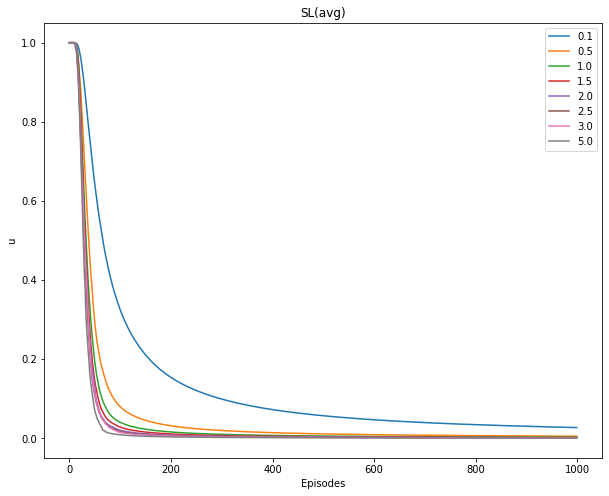

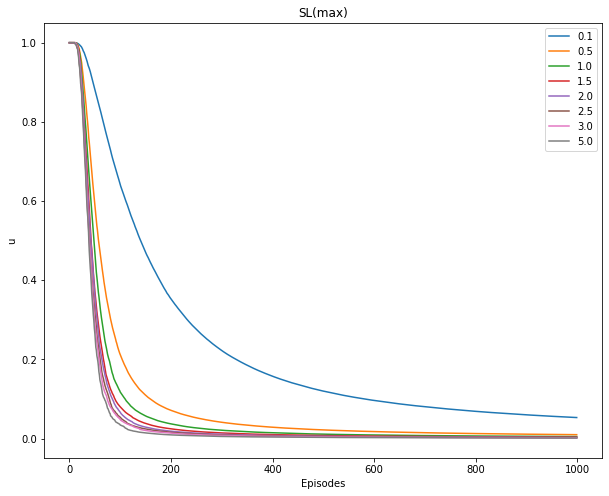

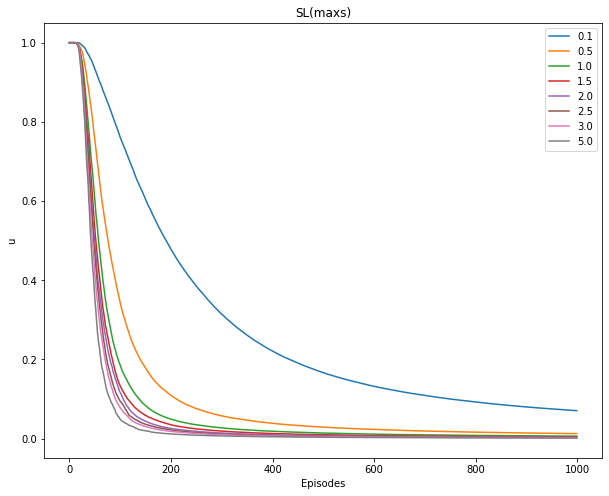

In [11]:
plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(epuncertainties[i,0,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(avg)')
plt.xlabel('Episodes')
plt.ylabel('u')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(epuncertainties[i,1,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(max)')
plt.xlabel('Episodes')
plt.ylabel('u')

plt.figure(figsize=(10,8))
for i in range(n_etas):
    plt.plot(np.arange(n_episodes),np.sum(epuncertainties[i,2,:,:],axis=0)/np.float(n_trials), label=str(etas[i]))
plt.legend()
plt.title('SL(maxs)')
plt.xlabel('Episodes')
plt.ylabel('u')